In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
labels = os.listdir("train2")
labels

['Closed', 'Open']

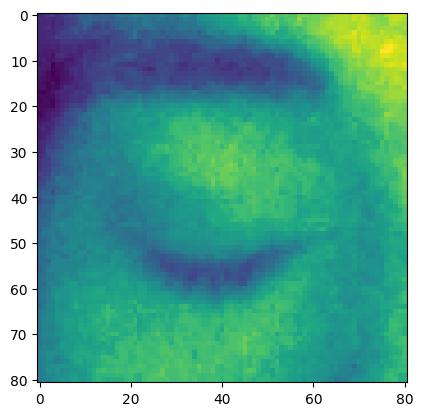

In [6]:
plt.imshow(plt.imread("train2/Closed/s0001_00005_0_0_0_0_0_01.png"))

In [7]:
X = []
Y = []

In [8]:
# Load Open Eyes images
for i in tqdm(glob('train2/Open/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(1)

# Load Closed Eyes images
for i in tqdm(glob('train2/Closed/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(0)

100%|███████████████████████████████████████████████████████████████████████████| 23996/23996 [02:28<00:00, 161.24it/s]


In [9]:
X = np.array(X)
X

array([[[ 47,  48,  49, ...,  90,  91,  91],
        [ 45,  49,  49, ...,  93,  93,  93],
        [ 45,  48,  50, ...,  93,  95,  92],
        ...,
        [ 61,  65,  66, ...,  75,  79,  81],
        [ 61,  63,  65, ...,  74,  76,  79],
        [ 61,  64,  67, ...,  76,  77,  77]],

       [[ 29,  31,  32, ...,  88,  88,  88],
        [ 29,  31,  30, ...,  91,  89,  90],
        [ 28,  30,  31, ...,  93,  91,  91],
        ...,
        [ 40,  45,  51, ...,  73,  77,  81],
        [ 42,  47,  51, ...,  74,  78,  81],
        [ 42,  47,  52, ...,  73,  76,  80]],

       [[ 92,  92,  91, ...,  49,  51,  53],
        [ 92,  91,  94, ...,  50,  51,  53],
        [ 95,  94,  94, ...,  52,  53,  52],
        ...,
        [ 69,  71,  71, ...,  66,  66,  63],
        [ 70,  71,  71, ...,  65,  63,  62],
        [ 68,  69,  69, ...,  67,  64,  61]],

       ...,

       [[126, 125, 126, ...,  69,  67,  65],
        [127, 126, 127, ...,  70,  68,  66],
        [128, 128, 128, ...,  71,  69,  68

In [10]:
X = X/255.0

In [11]:
Y = np.array(Y) #1 IS OPEN, 0 IS CLOSED
Y

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
X.shape

(47996, 64, 64)

In [13]:
X = np.expand_dims(X,-1) # 1 MORE DIMESINSION TO STORE OUTPUIT

In [14]:
X.shape

(47996, 64, 64, 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [17]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [19]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel2.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=16, callbacks=[callback,early_stopping])

Epoch 1/25
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8995 - loss: 0.2563
Epoch 1: val_loss improved from inf to 0.15065, saving model to bestModel2.keras
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 115s 70ms/step - accuracy: 0.8995 - loss: 0.2562 - val_accuracy: 0.9450 - val_loss: 0.1506
Epoch 2/25
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9663 - loss: 0.1062
Epoch 2: val_loss did not improve from 0.15065
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 112s 69ms/step - accuracy: 0.9663 - loss: 0.1062 - val_accuracy: 0.8553 - val_loss: 0.4089
Epoch 3/25
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9754 - loss: 0.0751
Epoch 3: val_loss improved from 0.15065 to 0.11741, saving model to bestModel2.keras
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 113s 70ms/step - accuracy: 0.9754 - loss: 0.0751 - val_accuracy: 0.9571 - val_loss: 0.1174
Epoch 4/25
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9775 - loss: 0.0655
Epoch 4: val_loss did not improve from 0.11741
1608/1608 ━━━━━━━━

In [20]:
model.evaluate(x_test, y_test)

495/495 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9922 - loss: 0.0236


[0.0240300502628088, 0.9921712279319763]

In [21]:
from keras.models import load_model
best_model = load_model('bestModel2.keras')
best_model.evaluate(x_test, y_test)

495/495 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9904 - loss: 0.0272


[0.025782909244298935, 0.9910979270935059]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


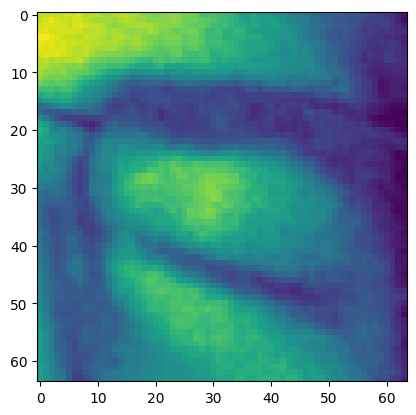

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


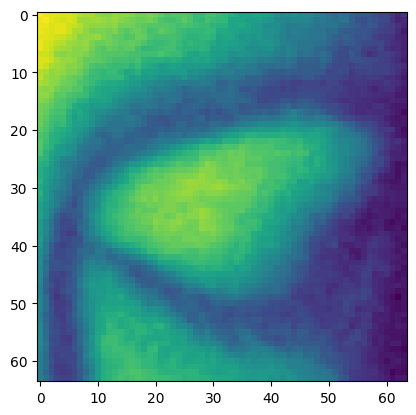

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


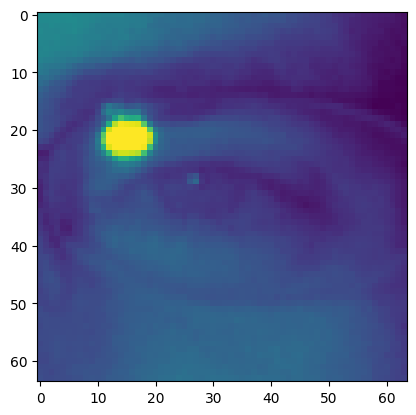

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


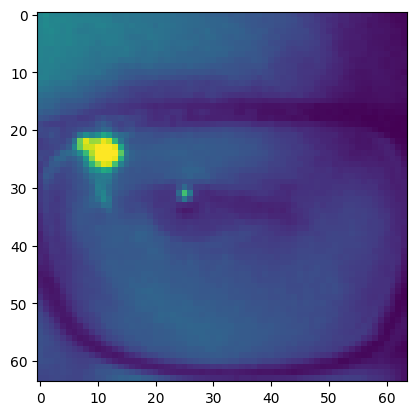

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


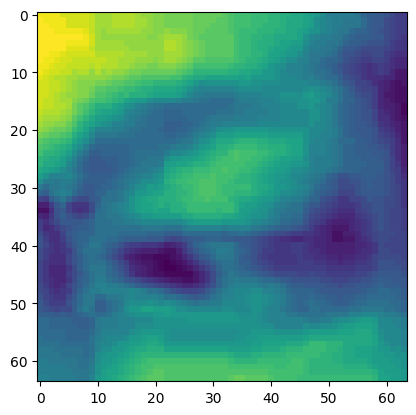

Closed


In [22]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

495/495 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step


Text(0.5, 25.722222222222214, 'Actual')

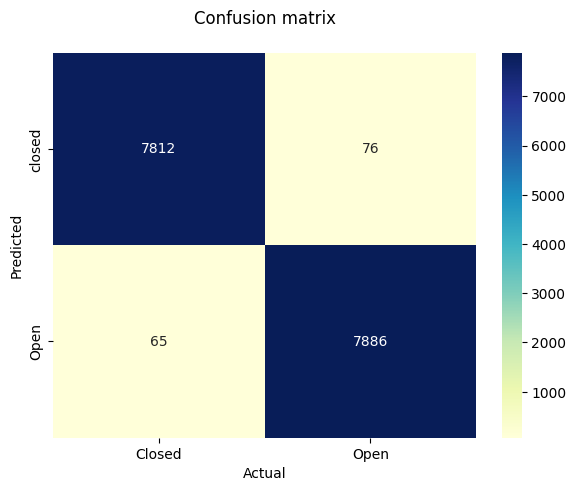

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.50).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")